# Exercise 3

Name: B.S.V.W. Munasinghe

Index Number: 190397E

In [1]:
#Importing Libraries
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

## Question 1

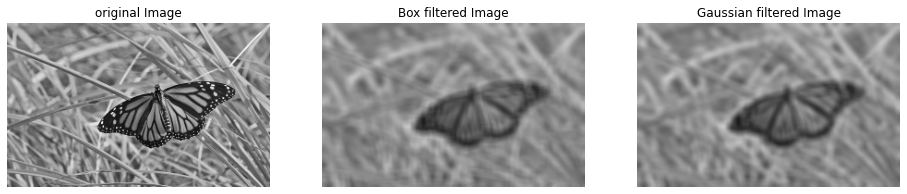

In [32]:
img = cv.imread("butterfly.jpg",cv.IMREAD_REDUCED_GRAYSCALE_4).astype(np.float32)
assert img is not None

a = 9
sigma = 4
box_kernal = np.ones((a,a),np.float32)/a**2
img_avg = cv.filter2D(img,-1,box_kernal)
im_gaussin = cv.GaussianBlur(img,(a,a),sigma)

fig,ax = plt.subplots(1,3,figsize=(16,16))
ax[0].axis('off')
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("original Image")


ax[1].axis('off')
ax[1].imshow(img_avg,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("Box filtered Image")

ax[2].axis('off')
ax[2].imshow(im_gaussin,cmap='gray',vmin=0,vmax=255)
ax[2].set_title("Gaussian filtered Image")

plt.show()

## Question 2

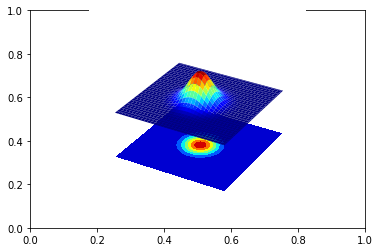

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig,ax = plt.subplots()
ax = fig.add_subplot(111,projection='3d')

step = 0.1
X = np.arange(-5,5+step,step)
Y = np.arange(-5,5+step,step)

XX,YY = np.meshgrid(X,Y)
sigma = 1
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))

surf = ax.plot_surface(XX,YY,g,cmap=cm.jet)
cset = ax.contourf(XX,YY,g,zdir='z',offset=np.min(g)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(g)-2,np.max(g))
plt.axis('off')
plt.show()

## Question 3

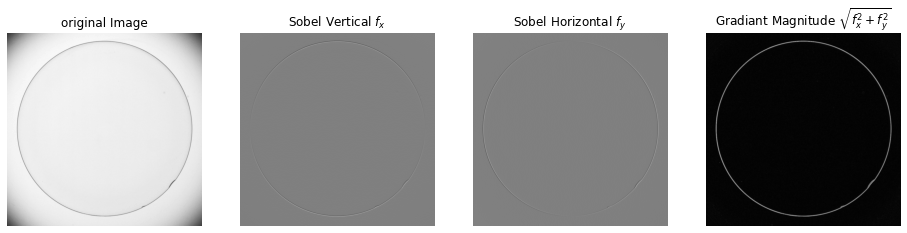

In [36]:
img = cv.imread("contact_lens.tif",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float32)

img_sobel_v = cv.filter2D(img,-1,sobel_v)
img_sobel_h = cv.filter2D(img,-1,sobel_h)
grad_mag = np.sqrt(img_sobel_v**2 + img_sobel_h**2)

fig,ax = plt.subplots(1,4,figsize=(16,16))


ax[0].axis('off')
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("original Image")


ax[1].axis('off')
ax[1].imshow(img_sobel_v,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Vertical $f_x$")

ax[2].axis('off')
ax[2].imshow(img_sobel_h,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title("Sobel Horizontal $f_y$")

ax[3].axis('off')
ax[3].imshow(grad_mag,cmap='gray')
ax[3].set_title("Gradiant Magnitude $\sqrt{f_x^2 + f_y^2}$")

plt.show()

## Question 4

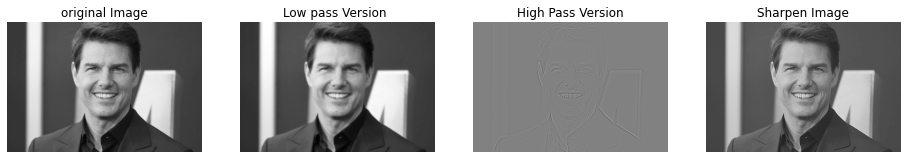

In [44]:
img = cv.imread("tom.jpg",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sigma = 2
gaussian_1D_kernal = cv.getGaussianKernel(5,sigma)

img_Low_pass = cv.sepFilter2D(img,-1,gaussian_1D_kernal,gaussian_1D_kernal)
img_High_pass = img - img_Low_pass
f_sharped = cv.addWeighted(img,1.0,img_High_pass,1.0,0)

fig,ax = plt.subplots(1,4,figsize=(16,16))


ax[0].axis('off')
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("original Image")


ax[1].axis('off')
ax[1].imshow(img_Low_pass,cmap='gray')
ax[1].set_title("Low pass Version ")

ax[2].axis('off')
ax[2].imshow(img_High_pass,cmap='gray')
ax[2].set_title("High Pass Version")

ax[3].axis('off')
ax[3].imshow(f_sharped,cmap='gray')
ax[3].set_title("Sharpen Image")

plt.show()